<a href="https://colab.research.google.com/github/benhaynor/JavaHW8StacksAndQueues/blob/master/Interactive_URST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Install dependencies and download models, libraries
#@markdown Google drive access is required in order to download models and examples.
!pip install "pillow<7"
!pip install tqdm
!pip install torchfile
!pip install -q condacolab
!pip install torch
!pip install torchvision
#!pip install torch==1.1.0 torchvision==0.3.0 -f https://download.pytorch.org/whl/torch_stable.html
#!pip install -q torch==0.3.0 torchvision
!pip install tensorboardX
!git clone https://github.com/czczup/URST.git


# Install the PyDrive wrapper & import libraries.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive_connection = GoogleDrive(gauth)

# Download models and examples
for file_id in ['1TFWHb-PQ57qYCaNm2lKUxtxouq3PJO0i', '1f-G5RsYMUqJlTgNBV7_MfRP_JIb6Oz2b']:
  downloaded = drive_connection.CreateFile({'id':file_id})
  downloaded.FetchMetadata(fetch_all=True)
  downloaded.GetContentFile(downloaded.metadata['title'])

!unzip examples.zip
!unzip URST-models.zip

# Copy models to where they are inspected
import os
import shutil
for d in os.scandir('URST-models'):
  os.popen('cp -R {}/* URST/{}'.format(d.path, d.name))


Style:


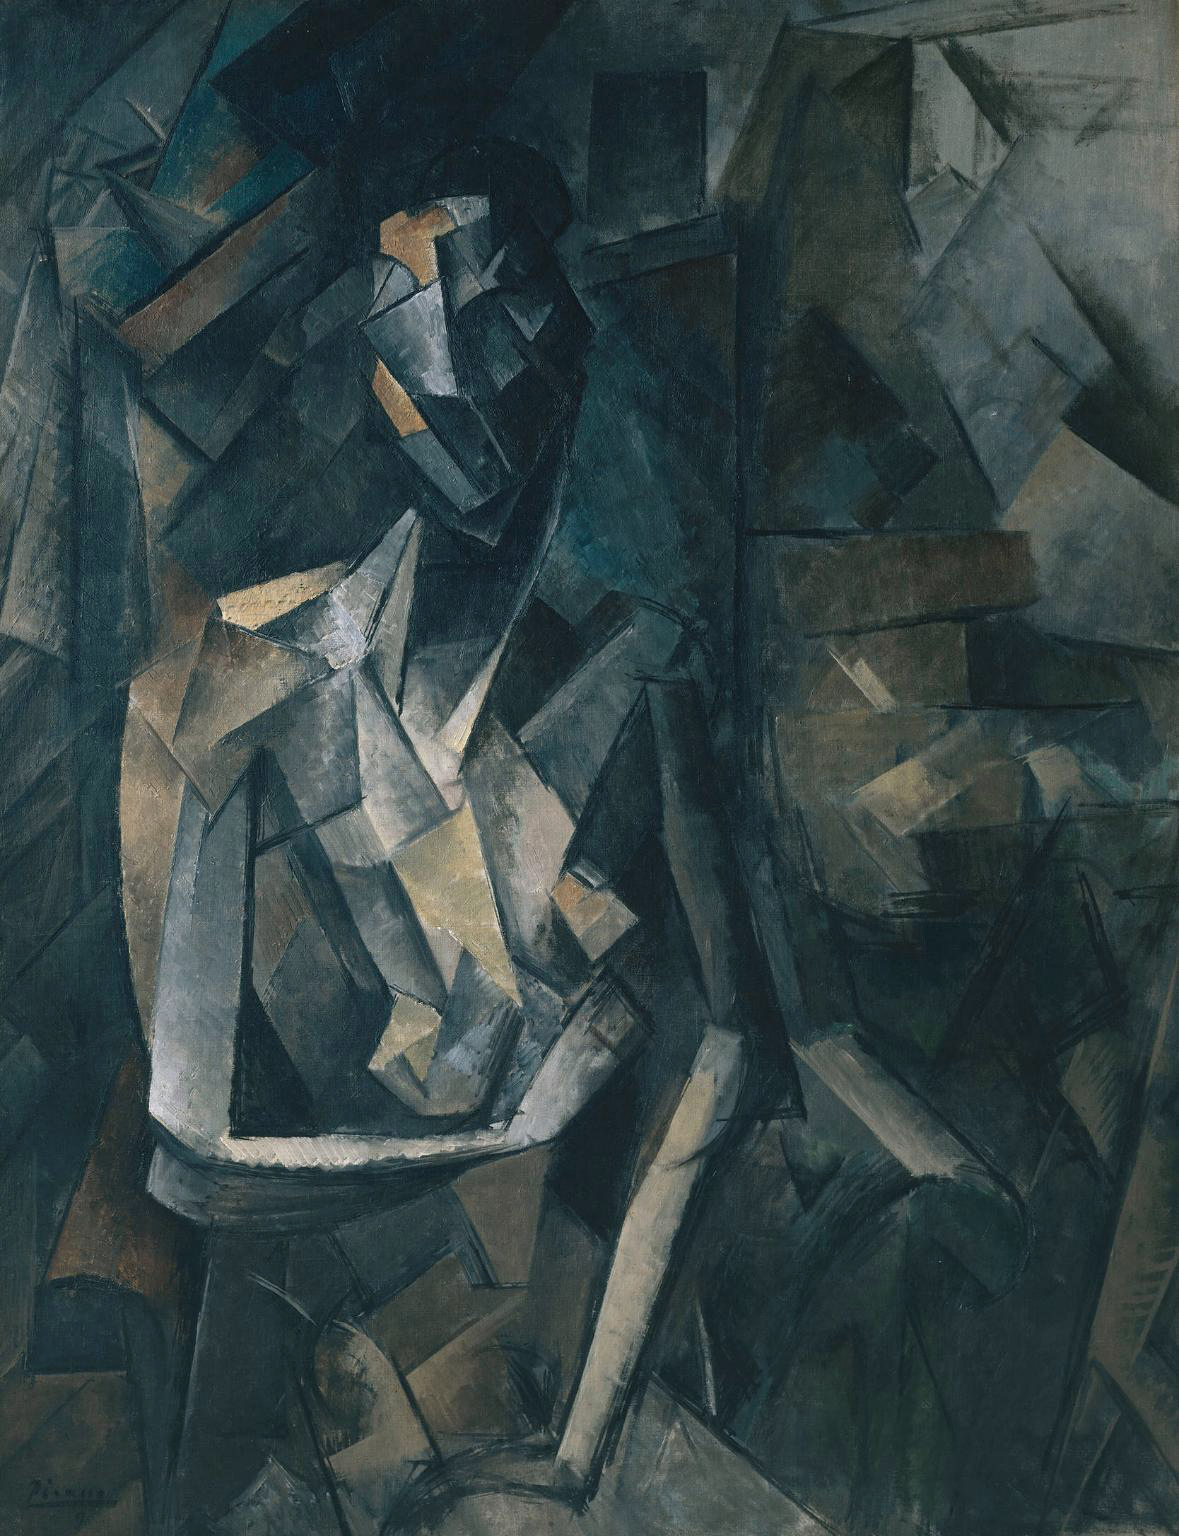

Content:


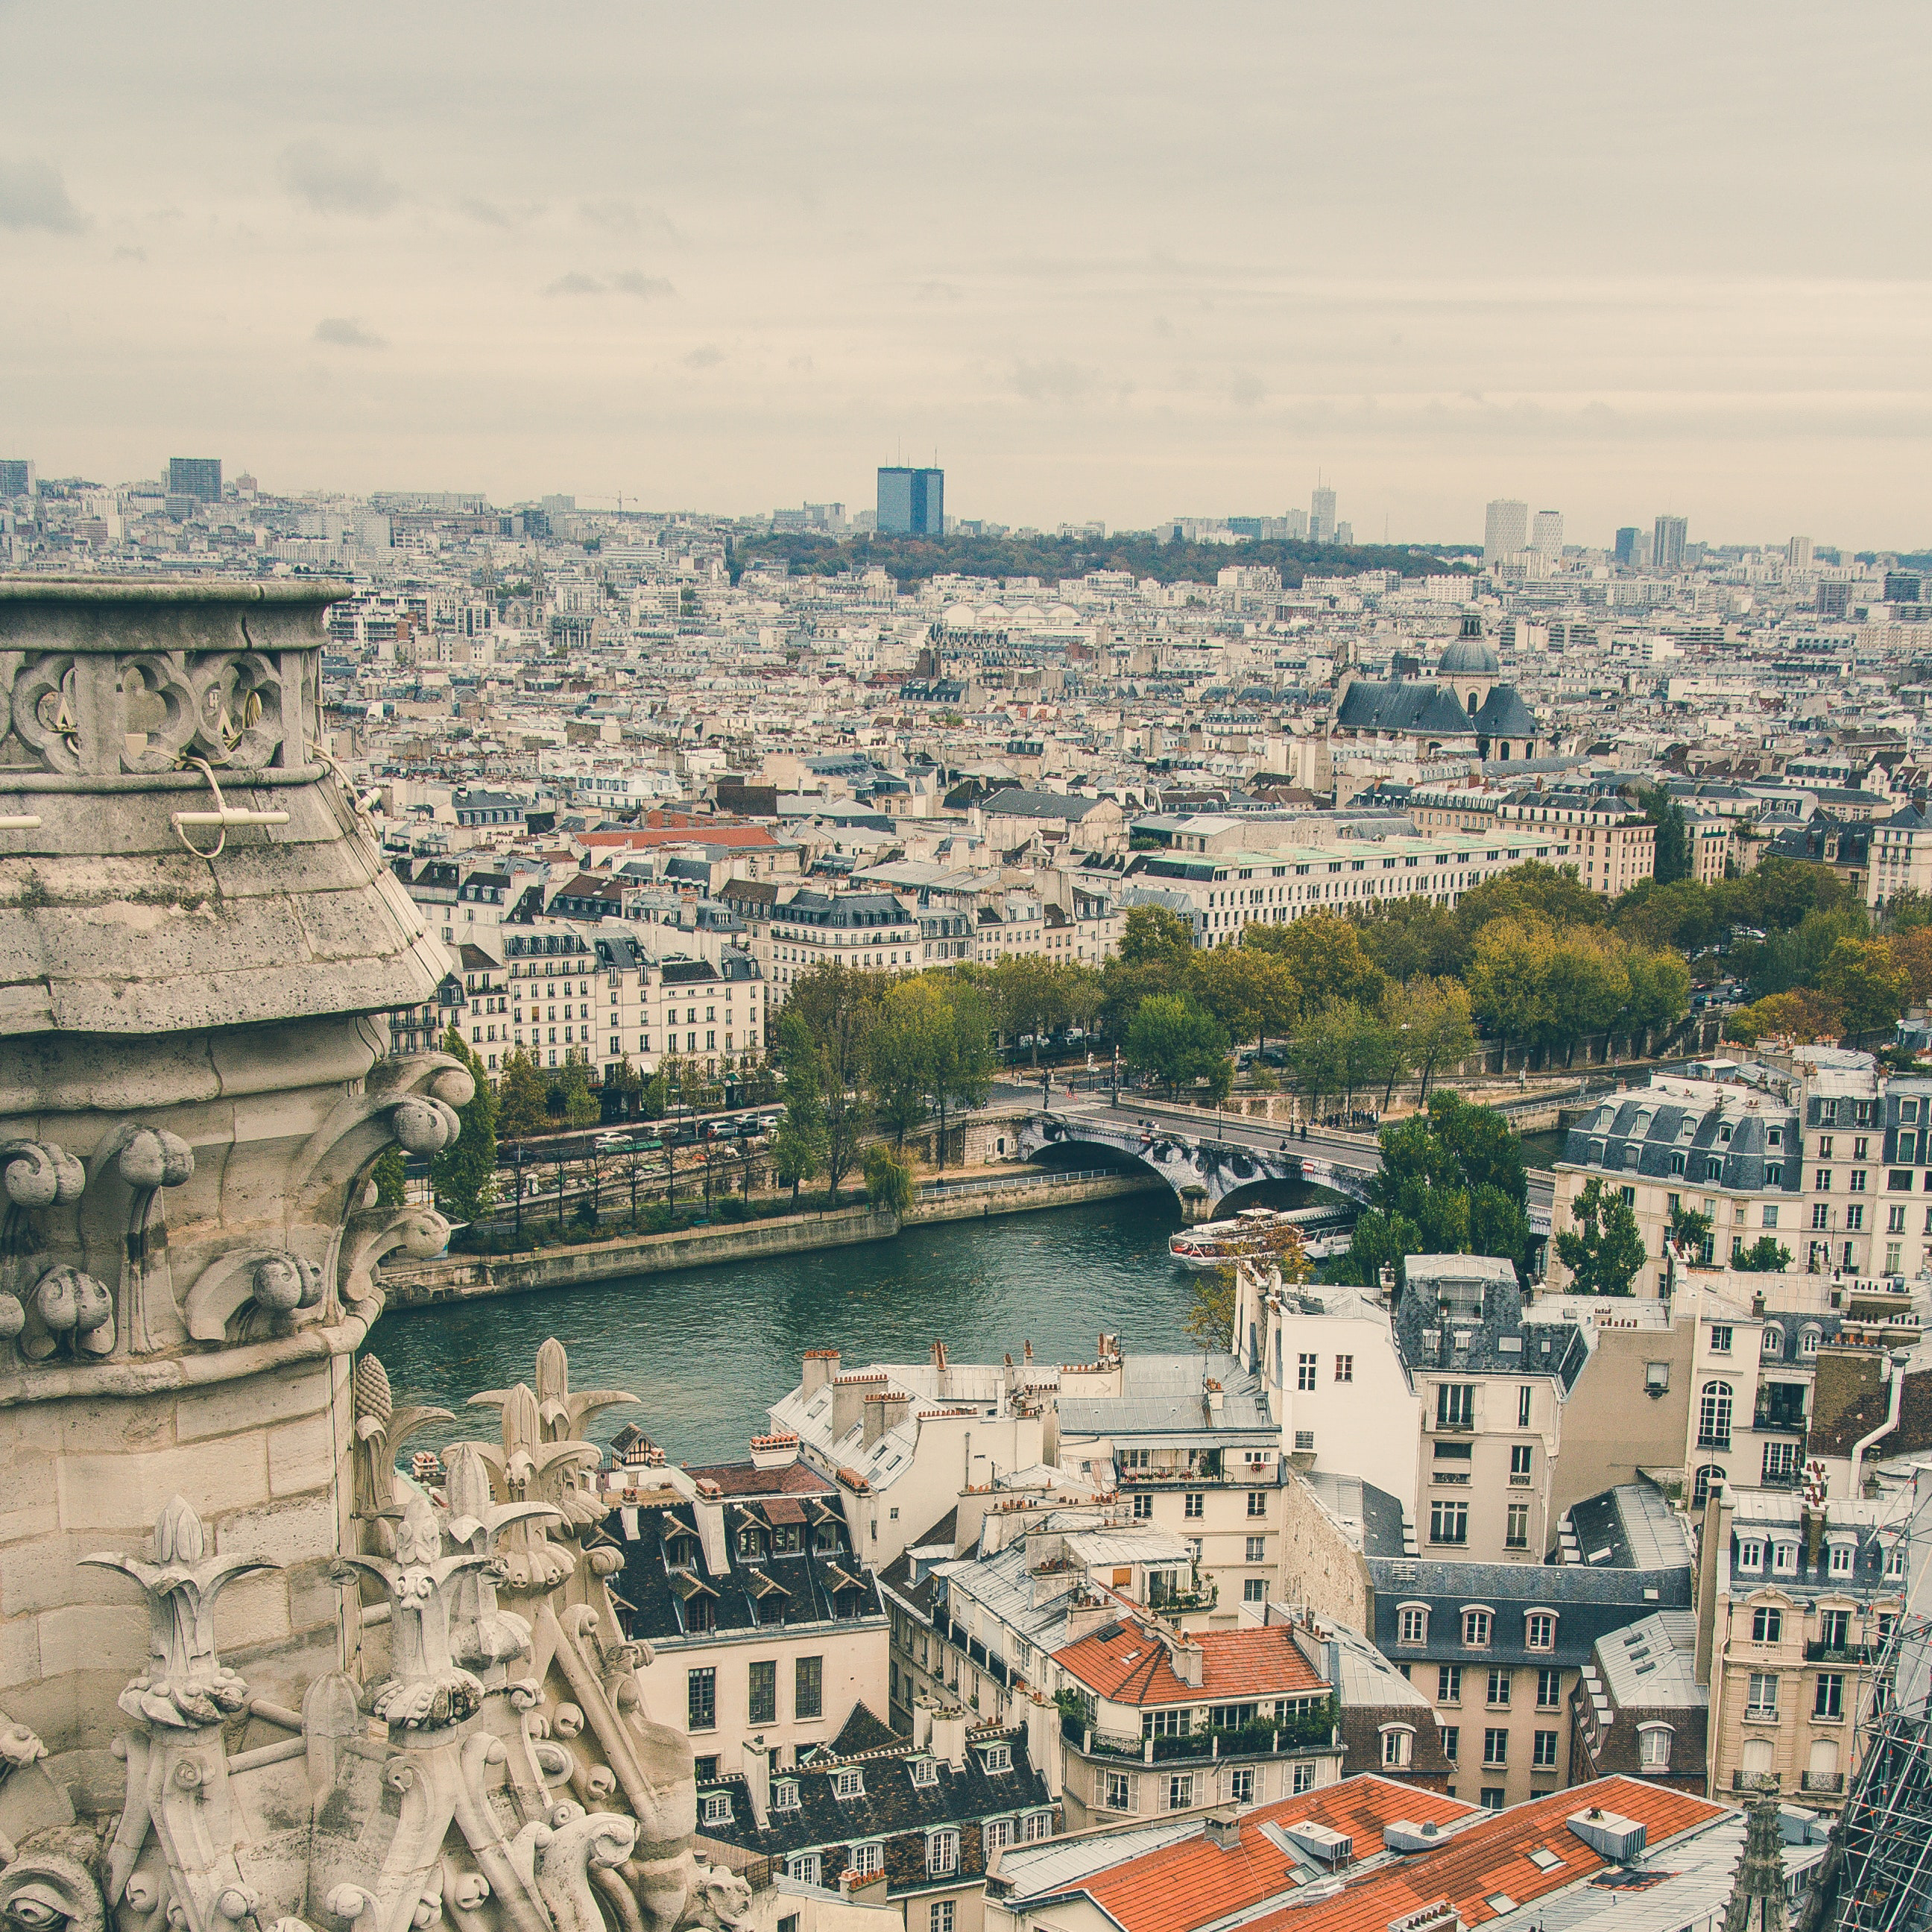

Namespace(URST=True, content='/content/examples/content/pexels-margerretta-548154.jpg', device='cuda', model='models/21styles.model', outf='/content/output/Zhang2017MultiStyle_picasso_seated_nude_hr_pexels-margerretta-548154', padding=32, patch_size=1000, style='/content/examples/style/picasso_seated_nude_hr.jpg', style_size=1024, test_speed=False, thumb_size=1024)
patch: torch.Size([9, 3, 928, 928])
thumb: torch.Size([3, 1024, 1024])
style: torch.Size([3, 1536, 1179])
100% 9/9 [00:01<00:00,  5.52it/s]
time: 3.44s


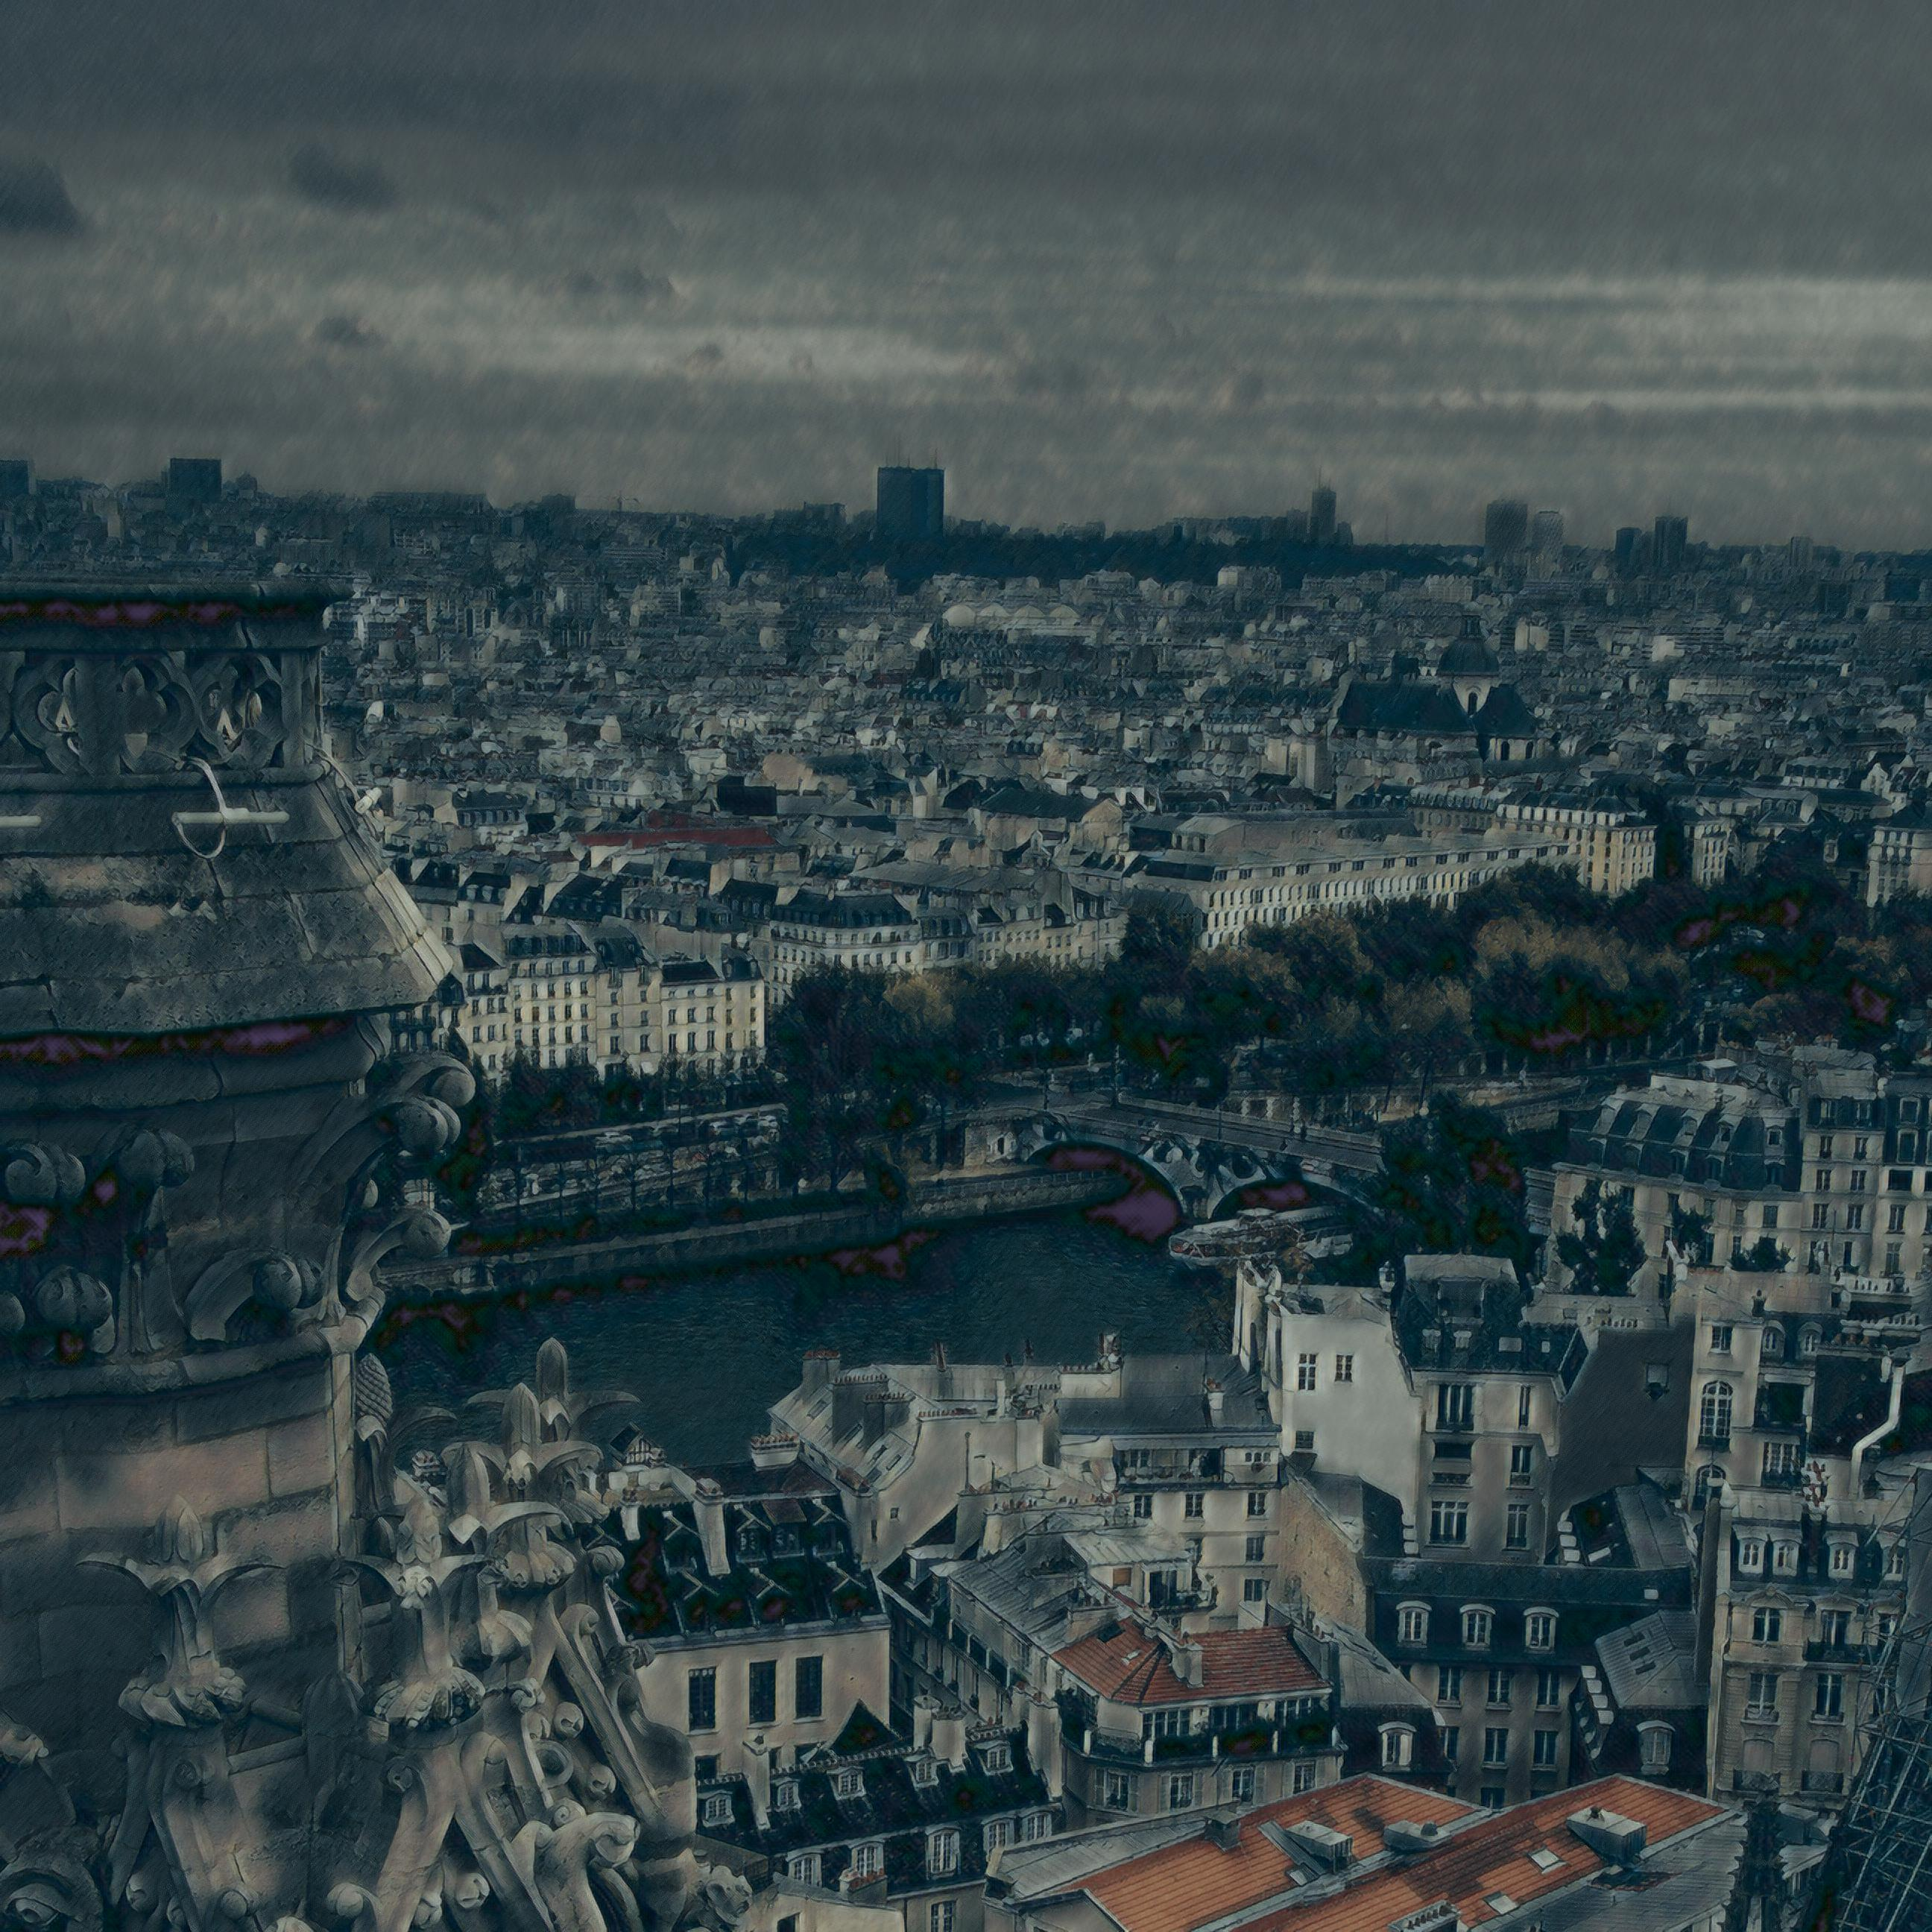

In [ ]:
# @title Run style transfer
# @markdown Choose style, content, and algorithm from dropdown
from IPython.display import Image
from IPython.display import display
style = 'picasso_seated_nude_hr.jpg' #@param ['seated-nude.jpg', 'mondrian.jpg', 'contrast_of_forms.jpg', 'still_life_with_skull.jpg', 'la_muse.jpg', 'mosaic_1024.png', 'en_campo_gris.jpg', 'mosaic.png', 'candy.jpg', 'asheville.jpg', '1-lava-flow-5-rebex-nie.jpg', 'Robert_Delauna_Portrait.jpg', 'green_line.jpg', 'V1.png', 'cuphead.png', 'line.jpg', 'picasso_seated_nude_hr.jpg', 'line2.png', 'picasso_self_portrait.jpg', 'composition.jpg', '81575.jpg', 'composition-x-1939.jpg']
content = 'pexels-margerretta-548154.jpg' #@param ['pexels-ryutaro-tsukata-6249822.jpg', 'pexels-julia-volk-5273641.jpg', 'pexels-maria-orlova-4915599.jpg', 'pexels-rachel-claire-4857738.jpg', 'pexels-mateusz-sałaciak-4275885.jpg', 'pexels-margerretta-548154.jpg', 'pexels-paulo-marcelo-martins-2412603.jpg', 'pexels-andrea-piacquadio-3830880.jpg', 'pexels-matt-hardy-2309272.jpg', 'pexels-ekrulila-2127784.jpg', 'pexels-xuan-hoa-le-61381.jpg', 'pexels-alisha-lubben-2305747.jpg']
algorithm = 'Zhang2017MultiStyle' #@param ['Huang2017AdaIN', 'Li2018Learning', 'Zhang2017MultiStyle', 'Li2017Universal']
content_image = Image('examples/content/{}'.format(content))
style_image = Image('examples/style/{}'.format(style))
print("Style:")
display(style_image)

print("Content:")
display(content_image)

def run_style_transfer(s, c, alg):
  os.popen('mkdir -p output')
  output_f = '/content/output/{}_{}_{}'.format(alg, s.split('.')[0], c.split('.')[0])
  style_path = '/content/examples/style/{}'.format(s)
  content_path = '/content/examples/content/{}'.format(c)
  command = "cd /content/URST/{} && CUDA_VISIBLE_DEVICES=0 python test.py --outf '{}' --style '{}' --content '{}' --URST".format(alg, output_f, style_path, content_path)
  !$command
  final_output_file = '{}/ours-patch1000-padding32.jpg'.format(output_f)
  return Image(final_output_file)
transfer = run_style_transfer(style, content, algorithm)
display(transfer)